<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Дамми-модель" data-toc-modified-id="Дамми-модель-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Дамми-модель</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.*

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
#подготовка данных
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
#модели регрессии
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#метрики модели
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
train = pd.read_csv('/datasets/gold_industry_train.csv', parse_dates=['date'], index_col='date')
test = pd.read_csv('/datasets/gold_industry_test.csv', parse_dates=['date'], index_col='date') 
full = pd.read_csv('/datasets/gold_industry_full.csv', parse_dates=['date'], index_col='date')

In [3]:
full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               19439 non-null  float64
 1   rougher.input.feed_ag                               19439 non-null  float64
 2   rougher.input.feed_pb                               19339 non-null  float64
 3   rougher.input.feed_sol                              19340 non-null  float64
 4   rougher.input.feed_rate                             19428 non-null  float64
 5   rougher.input.feed_size                             19294 non-null  float64
 6   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 7   rougher.input.floatbank10_xanthate                  19431 non-null  float64
 8   rougher.state.floatbank10_a_air          

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14579 entries, 2016-01-15 00:00:00 to 2017-12-09 13:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               14579 non-null  float64
 1   rougher.input.feed_ag                               14579 non-null  float64
 2   rougher.input.feed_pb                               14507 non-null  float64
 3   rougher.input.feed_sol                              14502 non-null  float64
 4   rougher.input.feed_rate                             14572 non-null  float64
 5   rougher.input.feed_size                             14478 non-null  float64
 6   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 7   rougher.input.floatbank10_xanthate                  14572 non-null  float64
 8   rougher.state.floatbank10_a_air          

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4832 non-null   float64
 3   rougher.input.feed_sol                      4838 non-null   float64
 4   rougher.input.feed_rate                     4856 non-null   float64
 5   rougher.input.feed_size                     4816 non-null   float64
 6   rougher.input.floatbank10_sulfate           4857 non-null   float64
 7   rougher.input.floatbank10_xanthate          4859 non-null   float64
 8   rougher.state.floatbank10_a_air             4859 non-null   float64
 9   rougher.state.floatbank10_a_level           4859 

В тестовом наборе данных меньше метрик, чем в обучающем.

In [6]:
#поиск метрик, которые не отображены в обучающем датасете
df_diff = train.drop(columns= test.columns).columns
list(df_diff)

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

Отсутствующие данные в тестовом наборе:
- *Обогащение:* расчеты отношения концентрата сульфатов и золота, а также исходного сырья сульфатов и золота во флотационных установках, соотношения золота и свинца; чернового концентрата свинца, золота, серебра и сульфатов; расчета эффективности и получившихся отвальных хвостов
- *Первичная очистка:* расчет получившихся концентрата свинца, золота, серебра и сульфатов, а также отвальных хвостов
- *Вторичная очистка:* расчет отвальных хвостов
- *Финальный концентрат:* расчет получившихся концентрата свинца, золота, серебра и сульфатов, а также отвальных хвостов

Возможно, подобная разница связана с тем, что эти данные рассчитываются на основе тех показателей, которые доступны в тестовом наборе. В условиях реальной работы доступа к этим данным изначально нет.

In [7]:
#рассчитываем по формуле эффективность обогащения
eval_rougher_output = (train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])) / (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])) * 100
eval_rougher_output

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2017-12-09 09:59:59    87.684717
2017-12-09 10:59:59    90.677361
2017-12-09 11:59:59    89.574376
2017-12-09 12:59:59    87.724007
2017-12-09 13:59:59    88.890579
Length: 14579, dtype: float64

In [8]:
#вычисляем среднюю абсолютную ошибку
mean_absolute_error(train['rougher.output.recovery'], eval_rougher_output)

9.83758577644259e-15

Значение ошибки ничтожное, можно сказать, что эффективность обогащения на этапе флотации рассчитана корректно.

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(train.isna().sum().sort_values(ascending = False))

In [9]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(test.isna().sum().sort_values(ascending = False))

secondary_cleaner.state.floatbank2_a_air      126
rougher.input.floatbank11_xanthate             46
rougher.input.feed_size                        44
primary_cleaner.input.xanthate                 43
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
primary_cleaner.input.depressant                9
rougher.input.floatbank11_sulfate               8
rougher.state.floatbank10_e_air                 7
rougher.input.feed_rate                         4
rougher.input.floatbank10_sulfate               3
primary_cleaner.state.floatbank8_d_air          2
primary_cleaner.state.floatbank8_c_air          2
secondary_cleaner.state.floatbank2_b_level      1
secondary_cleaner.state.floatbank3_a_air        1
secondary_cleaner.state.floatbank2_b_air        1
secondary_cleaner.state.floatbank3_a_level      1
primary_cleaner.state.floatbank8_d_level        1
secondary_cleaner.state.floatbank2_a_level      1
primary_cleaner.state.floatbank8_a_air          1


In [10]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(full[['rougher.output.recovery', 'final.output.recovery']].isna().sum().sort_values(ascending = False))

rougher.output.recovery    0
final.output.recovery      0
dtype: int64


В значениях целевых признаков нет пропусков. В остальных признаках пропуски есть. Поскольку замеры, сделанные примерно одно и то же время, одинаковы, предлагается заполнить пропуски соседними заполненными значениями. Также для создания модели сделаем одинаковым количество признаков в тренировочном и обучающем датасетах.

In [11]:
#сделаем одинаковым количество признаков в тренировочном и тестовом датасетах
train_features = train[test.columns]

In [12]:
print(list(train_features.columns) == list(test.columns))

True


In [13]:
test_features = test.fillna(method='ffill')
train_features = train_features.fillna(method='ffill')
full = full.fillna(method='ffill')

In [14]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(test.isna().sum().sort_values(ascending = False))

secondary_cleaner.state.floatbank2_a_air      126
rougher.input.floatbank11_xanthate             46
rougher.input.feed_size                        44
primary_cleaner.input.xanthate                 43
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
primary_cleaner.input.depressant                9
rougher.input.floatbank11_sulfate               8
rougher.state.floatbank10_e_air                 7
rougher.input.feed_rate                         4
rougher.input.floatbank10_sulfate               3
primary_cleaner.state.floatbank8_d_air          2
primary_cleaner.state.floatbank8_c_air          2
secondary_cleaner.state.floatbank2_b_level      1
secondary_cleaner.state.floatbank3_a_air        1
secondary_cleaner.state.floatbank2_b_air        1
secondary_cleaner.state.floatbank3_a_level      1
primary_cleaner.state.floatbank8_d_level        1
secondary_cleaner.state.floatbank2_a_level      1
primary_cleaner.state.floatbank8_a_air          1


In [15]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(train.isna().sum().sort_values(ascending = False))

secondary_cleaner.output.tail_sol                     920
rougher.state.floatbank10_e_air                       429
rougher.input.floatbank11_xanthate                    407
primary_cleaner.output.concentrate_sol                265
final.output.concentrate_sol                          192
rougher.input.feed_size                               101
secondary_cleaner.state.floatbank2_a_air               94
primary_cleaner.output.concentrate_pb                  88
rougher.input.feed_sol                                 77
final.output.tail_pb                                   75
rougher.input.feed_pb                                  72
primary_cleaner.input.xanthate                         61
primary_cleaner.output.tail_sol                        45
rougher.input.floatbank11_sulfate                      36
rougher.input.floatbank10_sulfate                      31
primary_cleaner.input.depressant                       28
primary_cleaner.input.sulfate                          23
secondary_clea

In [16]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(full.isna().sum().sort_values(ascending = False))

rougher.input.feed_au                                 0
primary_cleaner.output.tail_sol                       0
secondary_cleaner.state.floatbank3_b_level            0
secondary_cleaner.state.floatbank3_b_air              0
secondary_cleaner.state.floatbank3_a_level            0
secondary_cleaner.state.floatbank3_a_air              0
secondary_cleaner.state.floatbank2_b_level            0
secondary_cleaner.state.floatbank2_b_air              0
secondary_cleaner.state.floatbank2_a_level            0
secondary_cleaner.state.floatbank2_a_air              0
primary_cleaner.output.tail_pb                        0
secondary_cleaner.state.floatbank4_a_level            0
primary_cleaner.output.tail_ag                        0
primary_cleaner.output.tail_au                        0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_au           

**Общий вывод по этапу:**
- были загружены необходимые для дальнейшей работы библиотеки
- загружены и рассмотрены столбцы датафреймов проекта
- методом forward fill заполнены ячейки с NA-значениями
- выделен отдельный датафрейм `train_features`, который содержит тот же набор признаков, что и тестовый набор

## Анализ данных

In [17]:
def ci_bootstrap(concentrate, mean):
    state = np.random.RandomState(123)
    results = []

    for i in range(1000):
        sample = concentrate.sample(frac=0.2, replace=True, random_state = state)
        sample_mean = sample.mean()
        results.append(sample_mean)   
    s = pd.Series(results)
    lower = s.quantile(.025)
    upper = pd.Series(results).quantile(.975)
    print(f'95%-доверительный интервал среднего от {lower:.2f} до {upper:.2f}')  

In [18]:
def conc_change(metal):
    columns = ['rougher.input.feed_', 
               'rougher.output.concentrate_',
               'primary_cleaner.output.concentrate_',                 
               'final.output.concentrate_']
    columns = ['{0}{1}'.format(i, metal) for i in columns]
    
    for col in columns:
        mean_conc = full[col].mean()
        print(f'Среднее значение {col}: {mean_conc:.2f}')
        ci_bootstrap(full[col], mean_conc)
        print('\n\n')
        full[col].hist(bins=50, figsize=(20,15), histtype=u'step', linewidth=1.5)
    plt.title(f'Metal: {metal.upper()}', fontsize=26)
    plt.xlabel('Metal Concentration, %', fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.legend(['feed', 'rougher output', 'primary cleaner output', 'final output'])
    plt.show()

Среднее значение rougher.input.feed_au: 8.27
95%-доверительный интервал среднего от 8.21 до 8.32



Среднее значение rougher.output.concentrate_au: 19.77
95%-доверительный интервал среднего от 19.65 до 19.90



Среднее значение primary_cleaner.output.concentrate_au: 32.12
95%-доверительный интервал среднего от 31.94 до 32.32



Среднее значение final.output.concentrate_au: 44.08
95%-доверительный интервал среднего от 43.92 до 44.23





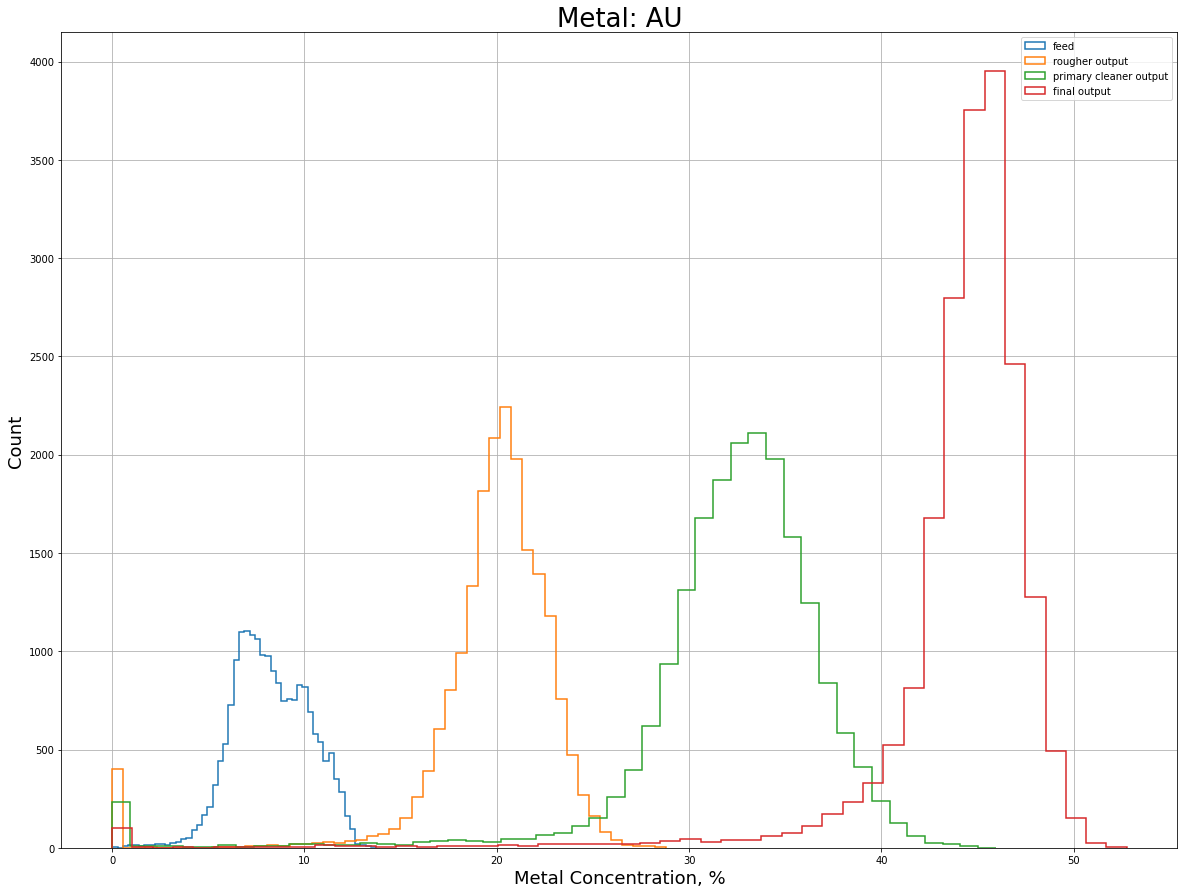

In [19]:
conc_change('au')

**Выводы по золоту:** с каждым новым этапом очистки доля золота в финальном концентрате увеличивается.

Среднее значение rougher.input.feed_pb: 3.58
95%-доверительный интервал среднего от 3.55 до 3.62



Среднее значение rougher.output.concentrate_pb: 7.61
95%-доверительный интервал среднего от 7.55 до 7.66



Среднее значение primary_cleaner.output.concentrate_pb: 9.81
95%-доверительный интервал среднего от 9.73 до 9.89



Среднее значение final.output.concentrate_pb: 9.98
95%-доверительный интервал среднего от 9.93 до 10.03





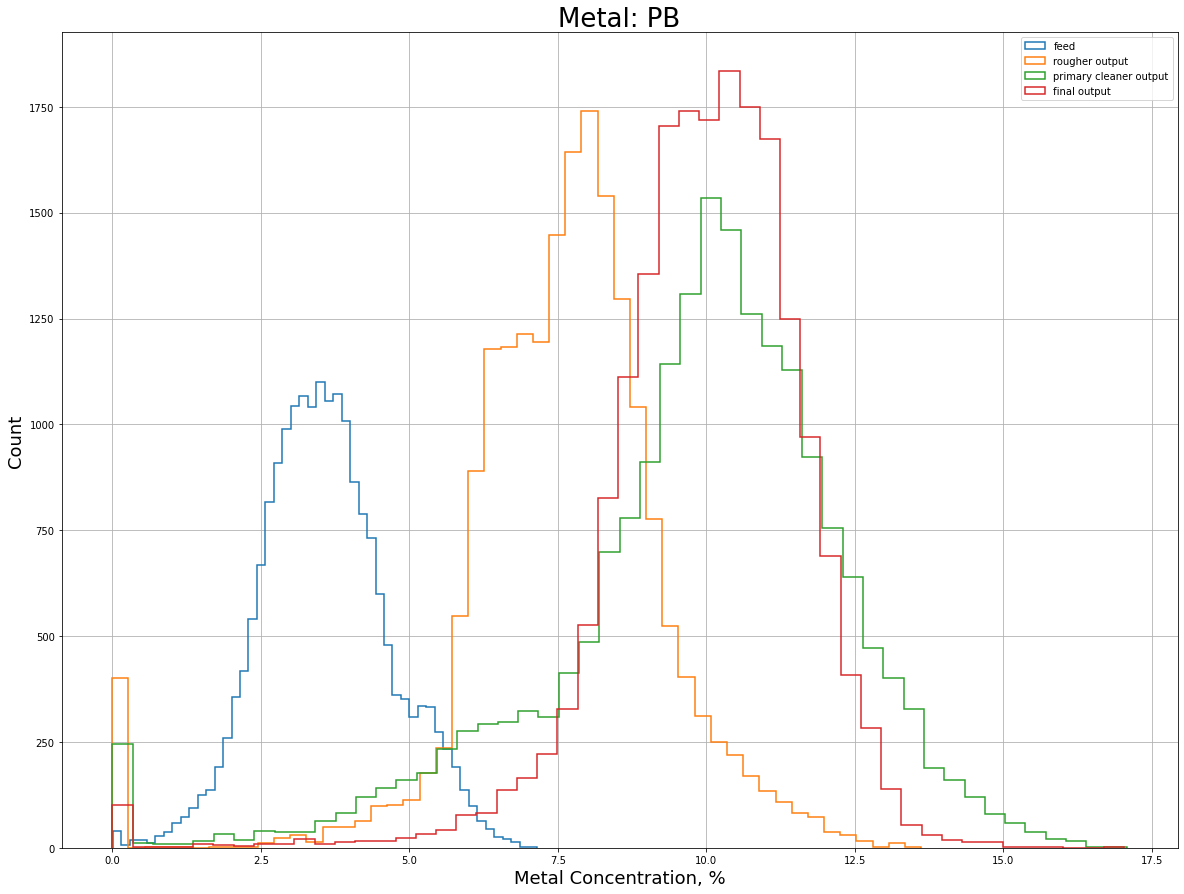

In [20]:
conc_change('pb')

**Выводы по свинцу:** доля свинца в финальном концентрате также увеличивается, однако в среднем не превышает 10%

Среднее значение rougher.input.feed_ag: 8.79
95%-доверительный интервал среднего от 8.74 до 8.85



Среднее значение rougher.output.concentrate_ag: 11.99
95%-доверительный интервал среднего от 11.90 до 12.08



Среднее значение primary_cleaner.output.concentrate_ag: 8.44
95%-доверительный интервал среднего от 8.38 до 8.50



Среднее значение final.output.concentrate_ag: 5.17
95%-доверительный интервал среднего от 5.12 до 5.21





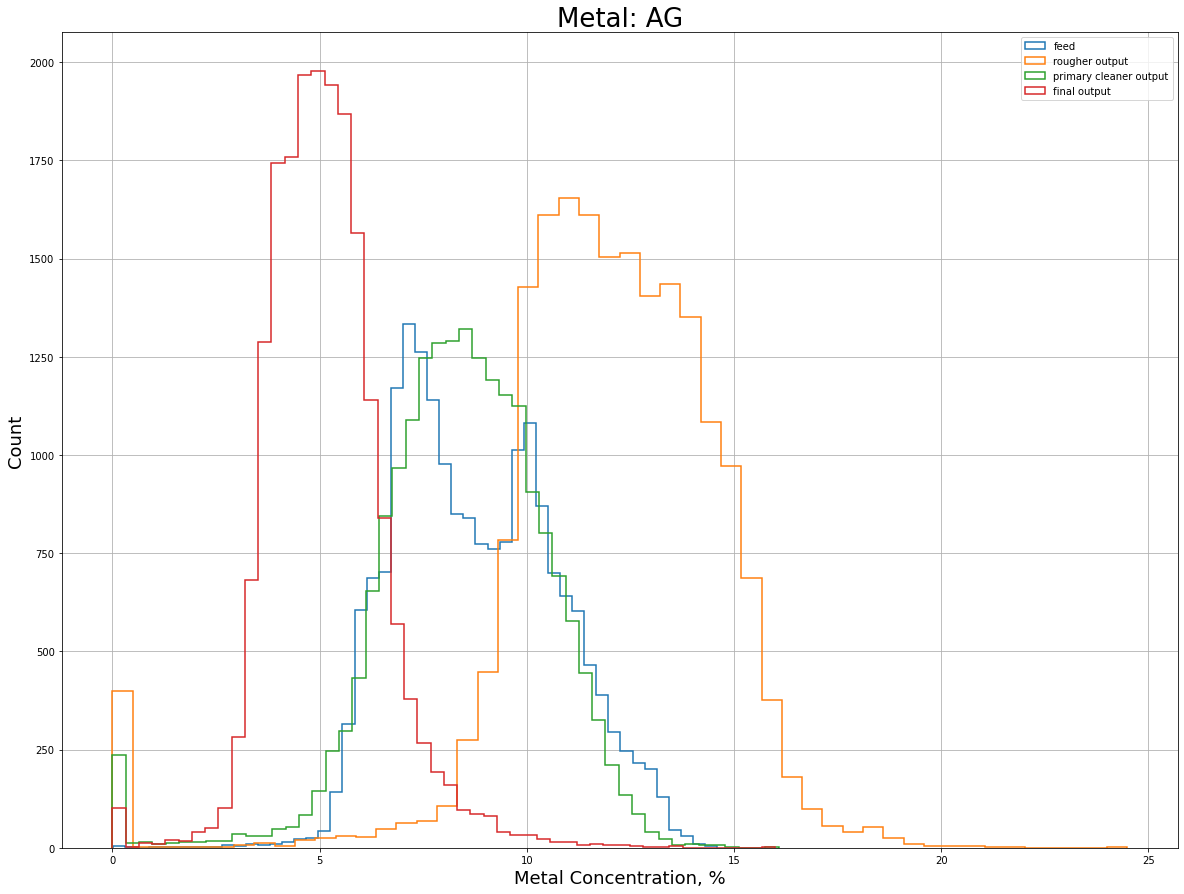

In [21]:
conc_change('ag')

**Выводы по серебру:** содержание металла в итоговом концентрате меньше, чем в исходном сырье.

In [22]:
#функция для удаления аномалий, уберем краевые значения и оставим только 99% датасета
def delete_anomalies(metal):
    columns = ['rougher.input.feed_', 
               'rougher.output.concentrate_',
               'primary_cleaner.output.concentrate_',                 
               'final.output.concentrate_']
    columns = ['{0}{1}'.format(i, metal) for i in columns]
    
    for col in columns:
        lower = full[col].quantile(0.05)
        upper = full[col].quantile(0.995)
        
        print('\n\n')
        train.loc[(train[col] >= lower) & (train[col] <= upper), col].hist(bins=50, figsize=(20,15), histtype=u'step', linewidth=1.5)
    plt.title(f'Metal: {metal.upper()} (after cutting anomalies)', fontsize=26)
    plt.xlabel('Metal Concentration, %', fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.legend(['feed', 'rougher output', 'primary cleaner output', 'final output'])
    plt.show()
    
    return train[(train[col] >= lower) & (train[col] <= upper)].index

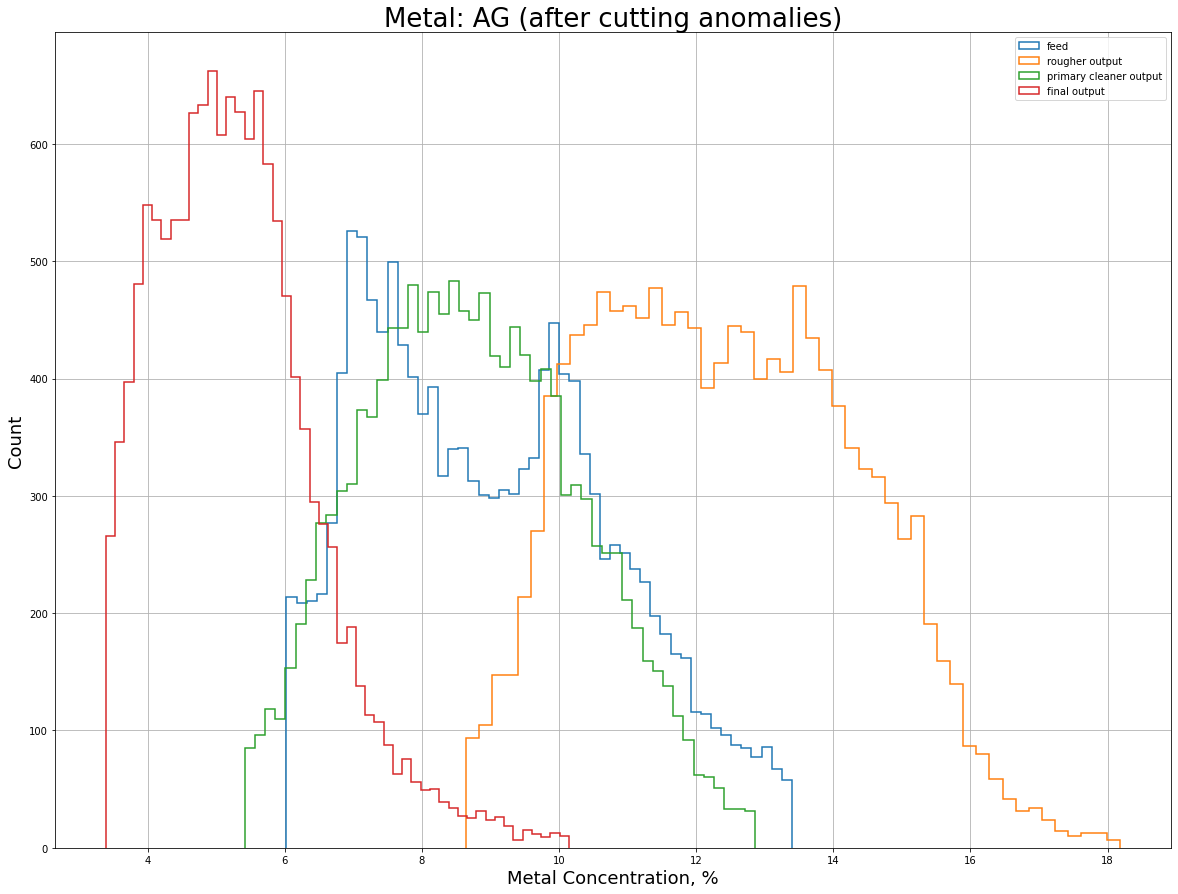

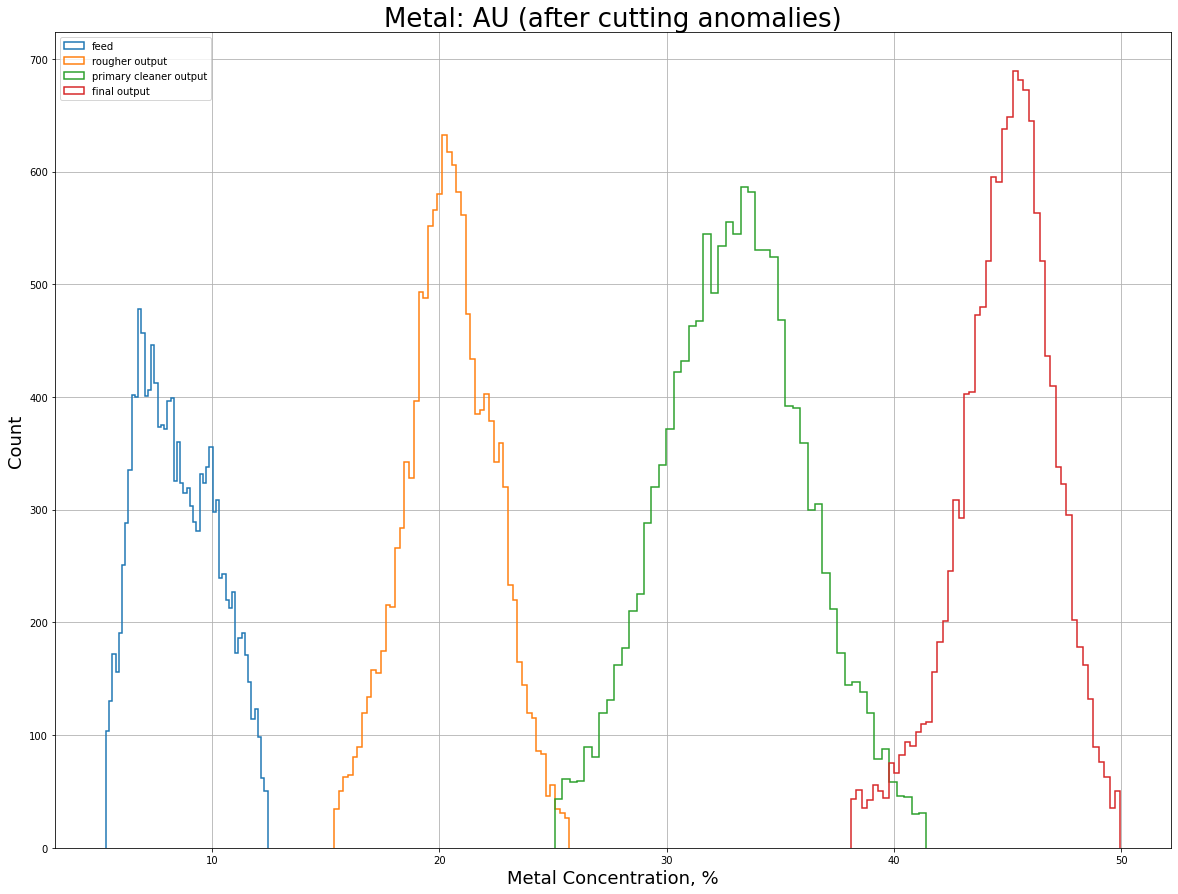

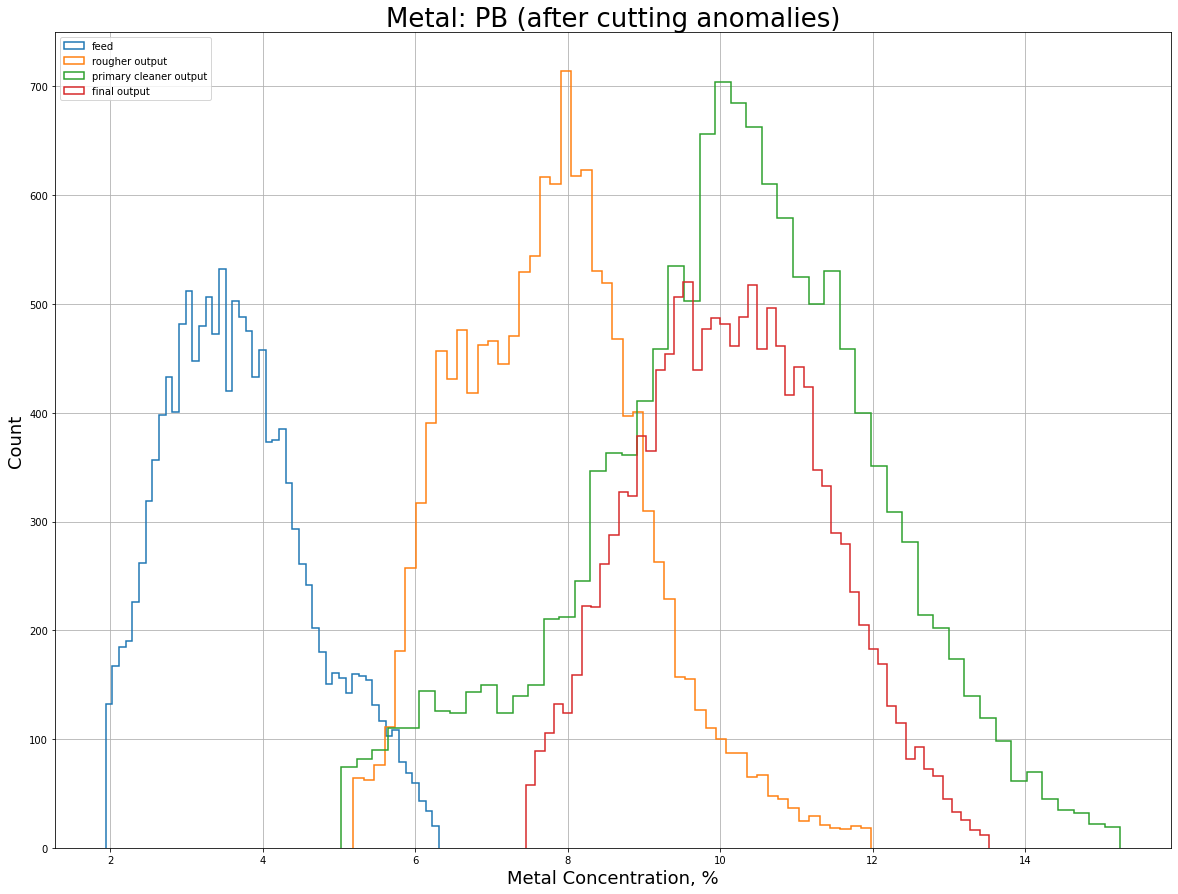

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12893 entries, 2016-01-15 00:00:00 to 2017-12-09 06:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       12893 non-null  float64
 1   rougher.input.feed_ag                       12893 non-null  float64
 2   rougher.input.feed_pb                       12893 non-null  float64
 3   rougher.input.feed_sol                      12893 non-null  float64
 4   rougher.input.feed_rate                     12893 non-null  float64
 5   rougher.input.feed_size                     12893 non-null  float64
 6   rougher.input.floatbank10_sulfate           12893 non-null  float64
 7   rougher.input.floatbank10_xanthate          12893 non-null  float64
 8   rougher.state.floatbank10_a_air             12893 non-null  float64
 9   rougher.state.floatbank10_a_level           1289

In [23]:
for m in ['ag', 'au', 'pb']:
    index_cut = delete_anomalies(m)
    train_features = train_features.filter(items = index_cut, axis=0)
train_features.info()

In [24]:
print(f'После работы с аномалиями тренировочный датасет с признаками потерял {1 - len(train_features) / len(train):.2%}')

После работы с аномалиями тренировочный датасет с признаками потерял 11.56%


In [25]:
ttest_ind(train_features['rougher.input.feed_size'], test_features['rougher.input.feed_size'], equal_var= False)

Ttest_indResult(statistic=-0.053204917015039016, pvalue=0.9575696960268852)

Н0: размер гранул исходного сырья в тренировочном и тестовом датасетах одинаковый.

Н1: размер гранул исходного сырья в тренировочном и тестовом датасетах разный.
p-value: 0.95

**Вывод:** не можем отвергнуть нулевую гипотезу. Размер исходного сырья в наборах данных одинаковый

In [26]:
def conc_sum(metals_list):
    columns = ['rougher.input.feed_', 
               'rougher.output.concentrate_',
               'primary_cleaner.output.concentrate_',                 
               'final.output.concentrate_']
    columns = ['{0}{1}'.format(i, metal) for i in columns for metal in metals]
    
    #исходное сырье
    feed = full.loc[:, columns[:3]].sum(axis=1)
    mean_sum_conc = feed.mean()
    print(f'Средняя суммарная концентрация металлов в исходном сырье: {mean_sum_conc:.2f}')
    ci_bootstrap(feed, mean_sum_conc)
    print('\n\n')
    feed.hist(bins=50, figsize=(20,15), histtype=u'step', linewidth=1.5)
    
    #черновой концентрат
    rougher = full.loc[:, columns[3:6]].sum(axis=1)
    mean_sum_conc = rougher.mean()
    print(f'Средняя суммарная концентрация металлов в черновом концентрате: {mean_sum_conc:.2f}')
    ci_bootstrap(rougher, mean_sum_conc)
    print('\n\n')
    rougher.hist(bins=50, figsize=(20,15), histtype=u'step', linewidth=1.5)
    
    #первичная очистка
    primary_cleaner = full.loc[:, columns[6:9]].sum(axis=1)
    mean_sum_conc = primary_cleaner.mean()
    print(f'Средняя суммарная концентрация металлов в концентрате после первичной очистки: {mean_sum_conc:.2f}')
    ci_bootstrap(primary_cleaner, mean_sum_conc)
    print('\n\n')
    primary_cleaner.hist(bins=50, figsize=(20,15), histtype=u'step', linewidth=1.5)
    
    #вторичная очистка
    final = full.loc[:, columns[9:]].sum(axis=1)
    mean_sum_conc = final.mean()
    print(f'Средняя суммарная концентрация металлов в концентрате после первичной очистки: {mean_sum_conc:.2f}')
    ci_bootstrap(final, mean_sum_conc)
    print('\n\n')
    final.hist(bins=50, figsize=(20,15), histtype=u'step', linewidth=1.5)
    
    plt.legend(['feed', 'rougher output', 'primary cleaner output', 'final output'])
    plt.xlabel('Суммарная концентрация')
    plt.ylabel('Частота')
    plt.show()

Средняя суммарная концентрация металлов в исходном сырье: 20.65
95%-доверительный интервал среднего от 20.51 до 20.78



Средняя суммарная концентрация металлов в черновом концентрате: 39.37
95%-доверительный интервал среднего от 39.15 до 39.60



Средняя суммарная концентрация металлов в концентрате после первичной очистки: 50.37
95%-доверительный интервал среднего от 50.11 до 50.62



Средняя суммарная концентрация металлов в концентрате после первичной очистки: 59.22
95%-доверительный интервал среднего от 59.04 до 59.41





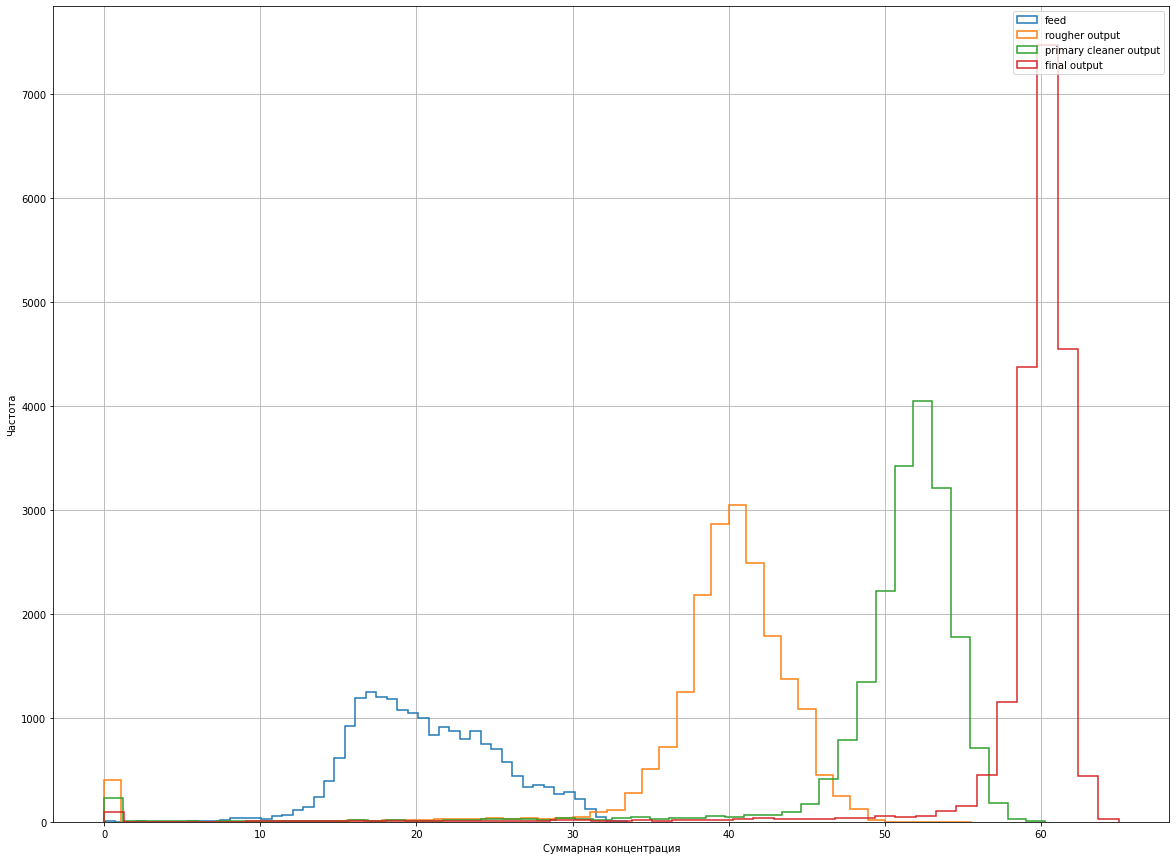

In [27]:
metals = ['au', 'pb', 'ag']
conc_sum(metals)

**Вывод:** в результате очистки концентрация металлов в итоговом концентрате увеличивается практически в три раза - с 20,7% до 59,2%.

**Общий вывод по этапу:**
- исследованы изменения концентраций металлов на разных этапах очистки руды, рассчитаны показатели суммарной концентраций
- из тренировочного датасета удалены строки с аномальными значениями концентраций (за границами 99%-ого интервала), потеря составила 11,56%
- удалось убедиться, что размер гранул исходного сырья в тренировочной и обучающей выборках совпадает

## Модель

3. Постройте модель 
3.1. Выделение целевых признаков и стандартизация
3.2. Функция для вычисления итоговой sMAPE. 
3.3. Обучение разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы. Вам пригодятся формулы метрик качества: формула sMAPE формула итогового sMAPE

In [28]:
#стандартизация признаков
scaler = StandardScaler()
train_features.loc[:,:] = scaler.fit_transform(train_features)
train_features.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,...,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04,1.289300e+04
mean,4.056150e-16,2.248518e-16,-7.054174e-17,1.410835e-16,4.232505e-16,-2.998024e-16,1.939898e-16,6.348757e-16,8.817718e-16,-2.468961e-16,...,7.583237e-16,-6.172403e-16,2.645315e-16,-6.172403e-16,1.410835e-16,-2.010440e-15,4.144327e-16,-1.428470e-15,-1.058126e-16,-2.870167e-15
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,...,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-4.490250e+00,-4.745074e+00,-3.544991e+00,-7.624172e+00,-4.500457e+00,-2.614528e+00,-3.695962e+00,-5.385632e+00,-6.721873e+00,-2.956908e+00,...,-3.643951e+00,-6.560210e+00,-3.085528e+00,-5.262449e+00,-2.905998e+00,-9.035240e+00,-2.185089e+00,-8.510430e+00,-3.423666e+00,-8.620586e+00
25%,-7.764000e-01,-8.255313e-01,-6.920461e-01,-5.139088e-01,-5.932992e-01,-5.120096e-01,-7.311796e-01,-6.349453e-01,-6.710827e-01,-1.286461e+00,...,-7.376504e-01,-3.381443e-01,-6.201289e-01,-6.078646e-01,-8.196930e-01,-3.633976e-01,-5.772181e-01,-3.655200e-01,-7.092618e-01,1.352532e-01
50%,-6.632591e-02,-7.371755e-02,-7.420826e-02,1.007107e-01,2.148519e-01,-1.995051e-01,-1.516885e-01,-8.116667e-03,-6.621971e-01,8.223315e-01,...,-1.487773e-01,-3.199727e-01,8.172408e-03,-5.967903e-01,-8.597121e-02,-3.441784e-01,-1.883025e-01,-3.600405e-01,1.871213e-01,1.544733e-01
75%,7.716507e-01,7.182313e-01,6.165020e-01,6.694741e-01,7.011200e-01,2.428793e-01,7.259193e-01,6.979346e-01,1.134972e+00,8.254387e-01,...,8.168839e-01,-2.831112e-01,6.289817e-01,9.418015e-01,4.744157e-01,-2.985929e-01,3.840349e-01,-3.434431e-01,7.421590e-01,1.695786e-01
max,2.683694e+00,2.976653e+00,3.322270e+00,3.342915e+00,2.291950e+00,1.884917e+01,5.403144e+00,2.751376e+00,2.431410e+00,1.102366e+00,...,2.191157e+00,4.975934e+00,1.699576e+00,6.931803e+00,5.197464e+00,6.218870e+00,3.037916e+00,9.470208e+00,2.390701e+00,1.045064e+01


In [29]:
#cтандартизация признаков
test_features.iloc[:,:] = scaler.transform(test_features.iloc[:,:])
test_features.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,...,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,-0.245879,-0.225469,-0.081500,0.068089,0.141122,0.000809,-0.137581,0.073548,-0.011853,0.102893,...,0.208507,-0.088157,0.133293,-0.050681,0.212596,-0.082599,0.182001,-0.079375,0.023668,0.022817
std,1.058276,1.036868,1.027869,1.027758,0.893570,0.863672,1.006181,0.933338,0.947106,0.963284,...,1.147225,0.923551,1.018627,1.017320,1.052312,0.942121,1.054797,1.006433,0.999924,1.096836
min,-4.490250,-4.745074,-3.544991,-7.624172,-4.500364,-2.614653,-3.690725,-5.372786,-4.901105,-2.350600,...,-3.643951,-6.558264,-3.085528,-5.247337,-2.905896,-9.029938,-2.026788,-8.504618,-3.380454,-8.620398
25%,-1.005628,-1.057383,-0.736827,-0.465382,-0.390997,-0.509332,-0.776948,-0.465052,-0.670944,-1.285141,...,-0.731631,-0.338359,-0.600258,-0.608059,-0.802061,-0.365003,-0.567795,-0.365557,-0.713057,0.136952
50%,-0.348151,-0.420092,-0.107840,0.152666,0.252918,-0.161860,-0.155207,0.071937,-0.660661,0.823361,...,0.230102,-0.321484,0.018110,-0.597920,0.219527,-0.347164,0.001739,-0.360821,0.187167,0.154984
75%,0.577456,0.588202,0.534120,0.769775,0.759613,0.328473,0.582122,0.700494,0.558360,0.825683,...,1.204281,-0.295654,1.049120,0.938464,0.835835,-0.317371,0.574523,-0.352367,1.090758,0.171228
max,2.626797,2.943657,3.410295,3.473781,2.150087,13.494392,5.161183,3.022527,2.490003,1.025621,...,2.192888,2.102423,1.873924,5.366997,3.268394,5.813153,2.323245,9.356366,2.361803,11.364493


In [30]:
#целевые значения были в изначальном тренировочном датасете
train_target = train.loc[train_features.index, ['rougher.output.recovery', 'final.output.recovery']]
#целевые значения тестового датасета не указаны, найдем их по дате измерения в общем датафрейме
test_target = full.loc[test_features.index, ['rougher.output.recovery', 'final.output.recovery']]
print(train_target.shape, test_target.shape)
print(train_target.head())
print(test_target.head())

(12893, 2) (4860, 2)
                     rougher.output.recovery  final.output.recovery
date                                                               
2016-01-15 00:00:00                87.107763              70.541216
2016-01-15 01:00:00                86.843261              69.266198
2016-01-15 02:00:00                86.842308              68.116445
2016-01-15 03:00:00                87.226430              68.347543
2016-01-15 04:00:00                86.688794              66.927016
                     rougher.output.recovery  final.output.recovery
date                                                               
2017-12-09 14:59:59                89.514960              70.281454
2017-12-09 15:59:59                89.858126              65.523246
2017-12-09 16:59:59                91.816623              74.817644
2017-12-09 17:59:59                88.478959              63.082720
2017-12-09 18:59:59                89.230316              74.463380


In [31]:
#функция расчета sMAPE и создание кастомной метрики для sklearn
def smape(pred, test):
    result = 100/len(pred) * np.sum(2 * np.abs(test - pred) / (np.abs(pred) + np.abs(test)))
    return result

def total_smape(smape_rougher, smape_final):
    return 0.25 * np.abs(smape_rougher) + 0.75 * np.abs(smape_final)

smape_score = make_scorer(smape, greater_is_better=False)

### Линейная регрессия

In [32]:
linreg = LinearRegression()
linreg.fit(train_features, train_target.iloc[:,0])
cv_res_rough = -cross_val_score(linreg, train_features, train_target.iloc[:,0], cv=5, scoring=smape_score)
cv_res_rough.mean()

13.254007521016018

In [33]:
linreg.fit(train_features, train_target.iloc[:,1])
cv_res_final = -cross_val_score(linreg, train_features, train_target.iloc[:,1], cv=5, scoring=smape_score)
cv_res_final.mean()

9.161292715301892

In [34]:
result_smape = total_smape(cv_res_rough.mean(), cv_res_final.mean())
result_smape

10.184471416730425

**Вывод:** 
- *Черновой концентрат* на кросс-валидации тренировочного датасета средняя ошибка составила 13,3% 
- *Финальный концентрат* на кросс-валидации тренировочного датасета средняя ошибка составила 9,2%
- *Итоговое sMAPE* - 10,1%

### Дерево решений

In [35]:
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1, 11),
    'min_samples_leaf': range(1, 11)
}

param_grid = {
    'max_features': ['log2'],
    'max_depth': range(2, 7),
    'min_samples_leaf': range(8,9,1)
}

dtr = DecisionTreeRegressor(random_state=123)

grid_rougher = GridSearchCV(dtr, param_grid=param_grid, scoring=smape_score, verbose=3)
grid_rougher.fit(train_features, train_target.iloc[:,0])

grid_rougher.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END max_depth=2, max_features=log2, min_samples_leaf=8; total time=   0.1s
[CV 2/5] END max_depth=2, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 3/5] END max_depth=2, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 4/5] END max_depth=2, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 5/5] END max_depth=2, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 1/5] END max_depth=4, max_features=log2, min_samples_leaf=8; total time=   0.0s
[CV 2/5] END max

DecisionTreeRegressor(max_depth=2, max_features='log2', min_samples_leaf=8,
                      random_state=123)

In [36]:
-grid_rougher.best_score_

12.467956683499366

In [37]:
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1, 11),
    'min_samples_leaf': range(1, 11)
}

param_grid = {
    'max_features': ['sqrt',],
    'max_depth': range(4, 5),
    'min_samples_leaf': range(8, 9)
}

dtr = DecisionTreeRegressor(random_state=123)

grid_final = GridSearchCV(dtr, param_grid=param_grid, scoring=smape_score, verbose=3)
grid_final.fit(train_features, train_target.iloc[:,1])

grid_final.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_leaf=8; total time=   0.0s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_leaf=8; total time=   0.0s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_leaf=8; total time=   0.0s
[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_leaf=8; total time=   0.0s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_leaf=8; total time=   0.0s


DecisionTreeRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=8,
                      random_state=123)

In [38]:
-grid_final.best_score_

8.607726888641064

In [39]:
total_smape(grid_rougher.best_score_, grid_final.best_score_)

9.572784337355639

**Вывод:** 
- *Черновой концентрат* на кросс-валидации лучшей модели тренировочного датасета средняя ошибка составила 11,9%, на тестовом датасете ошибка составила - 8,7%
- *Финальный концентрат* на кросс-валидации тренировочного датасета средняя ошибка лучшей модели составила 9,5%
- *Итоговое sMAPE* - 9,5%

### Случайный лес

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': range(1, 10)
}

param_grid = {
    'n_estimators': [300],
    'max_features': ['log2'],
    'max_depth': range(4, 5)
}

rfr = RandomForestRegressor(random_state=123)

grid_rougher = GridSearchCV(rfr, param_grid=param_grid, scoring=smape_score, verbose=3)
grid_rougher.fit(train_features, train_target.iloc[:,0])

grid_rougher.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   3.8s
[CV 2/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   3.8s
[CV 3/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   3.8s
[CV 4/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   3.8s
[CV 5/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   3.9s


RandomForestRegressor(max_depth=4, max_features='log2', n_estimators=300,
                      random_state=123)

In [41]:
-grid_rougher.best_score_

11.991252889886582

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': range(1, 11)
}

param_grid = {
    'n_estimators': [300],
    'max_features': ['sqrt'],
    'max_depth': range(5, 6)
}

rfr = RandomForestRegressor(random_state=123)

grid_final = GridSearchCV(rfr, param_grid=param_grid, scoring=smape_score, verbose=3)
grid_final.fit(train_features, train_target.iloc[:,1])

grid_final.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=300; total time=   6.2s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=300; total time=   6.1s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=300; total time=   6.1s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=300; total time=   6.1s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=300; total time=   6.2s


RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=123)

In [43]:
-grid_final.best_score_

8.129419693505186

In [44]:
total_smape(grid_rougher.best_score_, grid_final.best_score_)

9.094877992600535

**Вывод:** 
- *Черновой концентрат* на кросс-валидации лучшей модели тренировочного датасета средняя ошибка составила 12%
- *Финальный концентрат* на кросс-валидации тренировочного датасета средняя ошибка составила 8,1%
- *Итоговое sMAPE* - 9,1%

Лучше всего на тренировочном датасете показала себя модель случайного леса. Опробуем ее на тестовом наборе данных.

In [45]:
predictions_rougher = grid_rougher.best_estimator_.predict(test_features)
smape(predictions_rougher, test_target.iloc[:,0])
smape_rougher = smape(predictions_rougher, test_target.iloc[:,0])
smape_rougher

5.24500327984905

In [46]:
predictions_final = grid_final.best_estimator_.predict(test_features)
smape_final = smape(predictions_final, test_target.iloc[:,1])
smape_final

7.331819176064744

In [47]:
total_smape(smape_rougher, smape_final)

6.810115202010821

**Вывод:**
- *sMAPE чернового концентрата (тест)* - 5,2%
- *sMAPE итогового концентрата (тест)* - 7,3%
- *Итоговое sMAPE* - 6,8%
На тестовых данных модель показала лучшее значение целевой метрики, чем на тренировочном сете.

### Дамми-модель

In [48]:
dr = DummyRegressor()
dr.fit(train_features, train_target.iloc[:,0])
dummy_preds_rougher = dr.predict(test_features) 
smape_rougher_d = smape(dummy_preds_rougher, test_target.iloc[:,0])
smape_rougher_d

6.8736370942914045

In [49]:
dr = DummyRegressor()
dr.fit(train_features, train_target.iloc[:,1])
dummy_preds_final = dr.predict(test_features) 
smape_final_d = smape(dummy_preds_final, test_target.iloc[:,1])
smape_final_d

9.196308770392381

In [50]:
total_smape(smape_rougher_d, smape_final_d)

8.615640851367138

**Вывод:**
- дамми-ошибка предсказания чернового концентрата составила 6,9%, финального концентрата - 9,2%
- *Итоговое sMAPE (дамми)* - 8,6%
- дамми-модель оказалась хуже, чем лучшая из протестированных моделей.

**Общий вывод:**
- лучшая из протестированных моделей показали результат лучше, чем дамми-регрессия
- самой точной оказалась модель случайного леса со следующими параметрами: RandomForestRegressor(max_depth=5, max_features='sqrt', random_state=123), sMAPE чернового концентрата (тестовый набор) - 5,2%, sMAPE финального концентрата - 7,3%. Однако подбор гиперпараметров лучшей модели занял продолжительное время (20-30 мин на каждый целевой признак)